### imports

In [70]:
import tensorflow.keras as keras
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


### parametros

In [71]:
test_size = 0.2
random_state = 42
loss = 'mse'
metrics ='accuracy'
learning_rate = 0.1
patience = 10

In [72]:
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

X = X.astype(np.float32)
y = y.astype(np.int64)

df_mnist = pd.DataFrame(data = X, columns=[f"pixel_{i}" for i in range(X.shape[1])])
df_mnist['target'] = y

df_mnist

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


### separação dos dados

In [73]:
df_mnist_y = df_mnist['target']
df_mnist_X = df_mnist.drop(columns=['target'])

x_train, x_val, y_train, y_val = train_test_split(df_mnist_X, df_mnist_y, test_size=test_size, random_state=random_state, stratify=df_mnist_y)

x_scaled = StandardScaler().fit_transform(x_train)
x_val_scaled = StandardScaler().fit_transform(x_val)

In [74]:
model = keras.models.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_10 (Dropout)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [75]:
es_loss_val = keras.callbacks.EarlyStopping(monitor=f'val_{loss}', mode ='min', patience = patience, restore_best_weights=True)
es_val = keras.callbacks.EarlyStopping(monitor=f'val_{metrics}', mode ='max', patience = patience)

history = model.fit(x_scaled, y_train, batch_size=32, validation_data=(x_val_scaled,y_val), epochs=20, verbose = 1)

Epoch 1/20
1750/1750 [==============================] - 3s 2ms/step - loss: 0.4749 - accuracy: 0.8659 - val_loss: 0.1883 - val_accuracy: 0.9472
Epoch 2/20
1750/1750 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.9171 - val_loss: 0.1696 - val_accuracy: 0.9560
Epoch 3/20
1750/1750 [==============================] - 3s 2ms/step - loss: 0.2563 - accuracy: 0.9298 - val_loss: 0.1628 - val_accuracy: 0.9591
Epoch 4/20
1750/1750 [==============================] - 3s 2ms/step - loss: 0.2360 - accuracy: 0.9352 - val_loss: 0.1516 - val_accuracy: 0.9644
Epoch 5/20
1750/1750 [==============================] - 3s 2ms/step - loss: 0.2084 - accuracy: 0.9403 - val_loss: 0.1255 - val_accuracy: 0.9679
Epoch 6/20
1750/1750 [==============================] - 3s 2ms/step - loss: 0.2024 - accuracy: 0.9431 - val_loss: 0.1303 - val_accuracy: 0.9696
Epoch 7/20
1750/1750 [==============================] - 3s 2ms/step - loss: 0.1897 - accuracy: 0.9454 - val_loss: 0.1217 - val_accuracy:

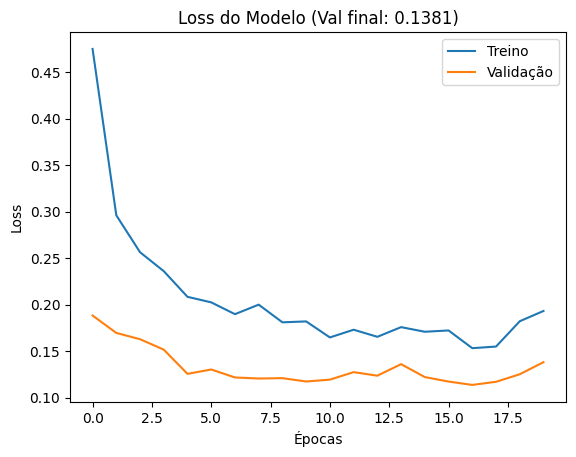

In [80]:
final_val_loss = history.history['val_loss'][-1]

plt.figure()
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title(f'Loss do Modelo (Val final: {final_val_loss:.4f})')
plt.legend()
plt.show()

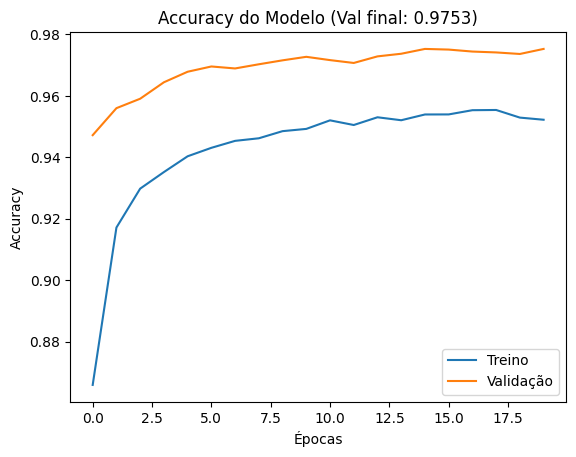

In [79]:
final_val_acc = history.history['val_accuracy'][-1]

plt.figure()
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title(f'Accuracy do Modelo (Val final: {final_val_acc:.4f})')
plt.legend()
plt.show()

438/438 [==============================] - 0s 900us/step


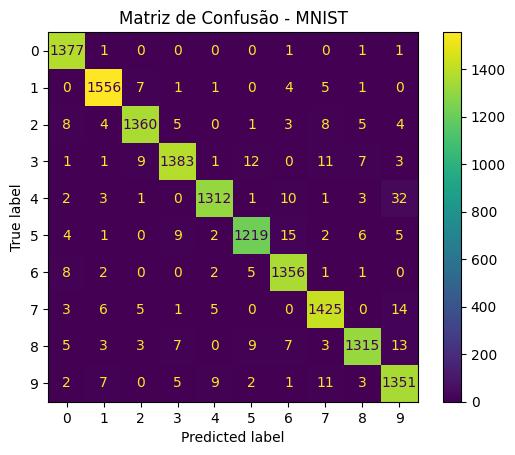

In [78]:

y_pred_prob = model.predict(x_val_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
cm = confusion_matrix(y_val, y_pred)

labels = list(range(10))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels
)
disp.plot()
plt.title("Matriz de Confusão - MNIST")
plt.show()